# **Introduction to Web Scraping**

## What is Web Scraping?

Definition: Web scraping is the automated process of extracting data from websites.

Purpose: Gather information, perform research, monitor changes, etc.


>


# Why Web Scraping?

   ### Benefits:


*  Real-time information retrieval
* Access to vast amounts of data
* Automation of repetitive tasks
* Competitive analysis and market research


# Key Components of Web Scraping

1. Web Requests: Sending HTTP requests to a website's server.
2.Parsing: Extracting structured data from the website's HTML.
3.Data Cleaning: Preprocessing and transforming the extracted data.
4.Storage: Saving the data for analysis or further use.   


# Legal and Ethical Considerations

1. Terms of Use: Respect websites' terms of use and robots.txt file.
2. Copyright: Avoid scraping copyrighted or private information.
3. Ethical Use: Do not overload servers, respect the website's resources.

#Popular Web Scraping Tools

* Beautiful Soup: Python library for HTML parsing.
* Scrapy: Python framework for building web spiders.
* Selenium: Automating web browser interaction.
* Requests: Python library for making HTTP requests.

# Web Scraping Workflow

* Send HTTP request to the website.
* Receive and parse HTML content.
* Extract desired data using tags, classes, or XPath.
* Clean and preprocess the data.
* Store data in a preferred format (CSV, JSON, database, etc.).


# **Data Preprocessing , Cleaning and Storing**

* *Converting the text to lowercase:* This step ensures that the text is consistent in terms of case.

* *Tokenization:* The text is tokenized into individual words or tokens. This is important for further processing.

* *Removing punctuation and non-alphanumeric tokens:* This step involves filtering out punctuation marks and any non-alphanumeric tokens that might not add value to the analysis.

* *Removing stopwords:* Stopwords are common words that often do not carry significant meaning and can be safely removed. NLTK provides a list of stopwords that you can use.

* *Lemmatization:* Words are lemmatized to reduce them to their base or dictionary form. This helps in grouping together variations of the same word.

In [ ]:
#import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Example raw text
raw_text = """
Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction
between computers and humans through natural language. The ultimate goal of NLP is to read, decipher,
understand, and make sense of human language in a way that is both valuable and meaningful.
"""
# Convert to lowercase
lowercase_text = raw_text.lower()

# Tokenize the text
tokens = word_tokenize(lowercase_text)

# Remove punctuation and non-alphanumeric tokens
cleaned_tokens = [token for token in tokens if token.isalnum()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in cleaned_tokens if token not in stop_words]


#stemming
stemmer = PorterStemmer()

# Perform stemming
stemmed_words = [stemmer.stem(word) for word in tokens]

# Join the stemmed words back into a sentence
stemmed_text = ' '.join(stemmed_words)

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Join the tokens back into a cleaned text
cleaned_text = ' '.join(lemmatized_tokens)

print("Original Text:", raw_text)
print("Cleaned Text:", cleaned_text)


Original Text: 
Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction
between computers and humans through natural language. The ultimate goal of NLP is to read, decipher, 
understand, and make sense of human language in a way that is both valuable and meaningful.

Cleaned Text: natural language processing nlp field artificial intelligence focus interaction computer human natural language ultimate goal nlp read decipher understand make sense human language way valuable meaningful


# connecting mongo db and storing the preprocessed data

In [ ]:
!pip install pymongo
import pymongo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.6/603.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 8.0 MB/s eta 0:00:00


In [ ]:
# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["mydatabase"]  #define the database -> 'mydatabase'
collection = db["cleaned_text"]  # define the collection name -> 'cleaned_text'

# Example cleaned text
txt = cleaned_text  #give the preprocessed cleaned text here

# Create a document to insert into MongoDB
document = {"cleaned_text": txt}

# Insert the document into the collection
collection.insert_one(document)

#Print success message
print("Cleaned text stored in MongoDB.")

Cleaned text stored in MongoDB.


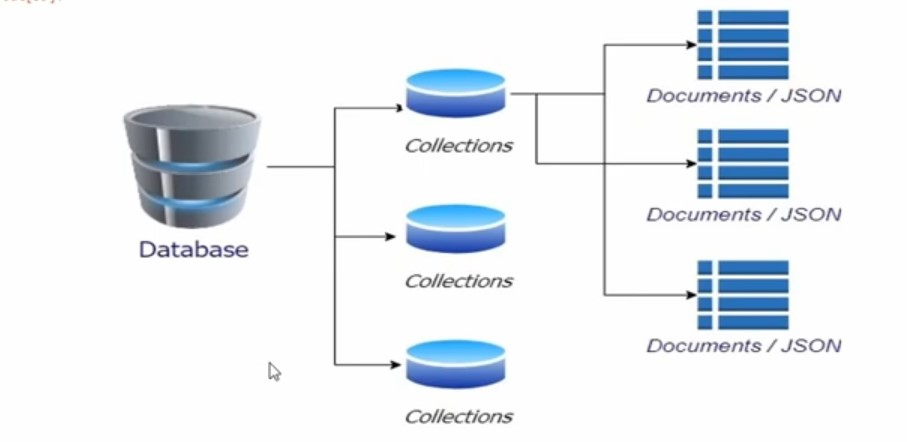

In [ ]:
#mongo db hierarchy image

from google.colab import drive
from IPython.display import Image
image_path='/content/drive/MyDrive/Colab Notebooks/mongo_database.jpg'
Image(filename=image_path)